# Análise das receitas da prefeitura de João Pessoa

In [308]:
#Imports
%pip install pandas
import pandas as pd


Note: you may need to restart the kernel to use updated packages.


In [309]:
# Read data
df2021 = pd.read_csv(filepath_or_buffer='./data/2021.csv', sep='|')
df2022 = pd.read_csv(filepath_or_buffer='./data/2022.csv', sep='|')
df2023 = pd.read_csv(filepath_or_buffer='./data/2023.csv', sep='|')
df2024 = pd.read_csv(filepath_or_buffer='./data/2024.csv', sep='|')

In [310]:
dtypes =[
    df2021.dtypes,
    df2022.dtypes,
    df2023.dtypes,
    df2024.dtypes
]
dtypes

[mes_ano_referencia     object
 codigo_recebimento      int64
 descricao_receita      object
 fonte_recurso          object
 nome_entidade          object
 valor                 float64
 dtype: object,
 mes_ano_referencia     object
 codigo_recebimento      int64
 descricao_receita      object
 fonte_recurso          object
 nome_entidade          object
 valor                 float64
 dtype: object,
 mes_ano_referencia     object
 codigo_recebimento      int64
 descricao_receita      object
 fonte_recurso          object
 nome_entidade          object
 valor                 float64
 dtype: object,
 mes_ano_referencia     object
 codigo_recebimento      int64
 descricao_receita      object
 fonte_recurso          object
 nome_entidade          object
 valor                 float64
 dtype: object]

In [311]:
# concat all data frames
pd.set_option("float_format",'{:.2f}'.format)
df = pd.concat([df2021, df2022, df2023, df2024])

df['mes_ano'] = pd.to_datetime(df['mes_ano_referencia'])
df['ano'] = df['mes_ano'].dt.year
df['trimestre'] = df['mes_ano'].dt.to_period("Q")
df['trimestre_id'] = df['mes_ano'].dt.quarter
df.head(3)

C:\Users\jerso\AppData\Local\Temp\ipykernel_20596\1841760440.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['mes_ano'] = pd.to_datetime(df['mes_ano_referencia'])


,mes_ano_referencia,codigo_recebimento,descricao_receita,fonte_recurso,nome_entidade,valor,mes_ano,ano,trimestre,trimestre_id
0,1/2021,1990991100,OUTRAS RECEITAS - PRIMARIAS - PRINCIPAL,0.209-OUTROS RECURSOS NAO VINCULADOS,AUTARQUIA ESPECIAL MUNICIPAL DE LIMPEZA URBANA...,3683.95,2021-01-01,2021,2021Q1,1
1,1/2021,1122011100,TAXAS PELA PRESTACAO DE SERVICOS - PRINCIPAL,0.209-OUTROS RECURSOS NAO VINCULADOS,AUTARQUIA ESPECIAL MUNICIPAL DE LIMPEZA URBANA...,136915.73,2021-01-01,2021,2021Q1,1
2,1/2021,1321001100,REMUNERACAO DE DEPOSITOS BANCARIOS - PRINCIPAL,0.209-OUTROS RECURSOS NAO VINCULADOS,AUTARQUIA ESPECIAL MUNICIPAL DE LIMPEZA URBANA...,155.56,2021-01-01,2021,2021Q1,1


## Lista descrição receita

In [312]:
descricoes_receitas = pd.DataFrame(df["descricao_receita"].unique(), columns=["descricoes_receitas"]).sort_values("descricoes_receitas")

descricoes_receitas.head(3)

,descricoes_receitas
102,ALUGUEIS E ARRENDAMENTOS - PRINCIPAL
91,AMORTIZACAO DE EMPRESTIMOS CONTRATUAIS
63,AMORTIZACAO DE EMPRESTIMOS CONTRATUAIS - PRINC...


## Lista fonte recurso

In [313]:
fontes_recursos = pd.DataFrame(df["fonte_recurso"].unique(), columns=["fontes_recursos"]).sort_values("fontes_recursos")

fontes_recursos.head(3)

,fontes_recursos
79,# TRANSFERENCIAS ACS.
71,#.TRANSFERENCIAS SUS DO GOVERNO FEDERAL - MANU...
77,#DEMAIS TRANSFERENCIAS.


## Lista entidades

In [314]:
entidades = pd.DataFrame(df["nome_entidade"].unique(), columns=["entidades"]).sort_values("entidades")

entidades.head(3)

,entidades
0,AUTARQUIA ESPECIAL MUNICIPAL DE LIMPEZA URBANA...
1,FUNDACAO CULTURAL DE JOAO PESSOA
2,"FUNDO DE GESTAO, DESENVOLVIMENTO E MODERNIZACA..."


## Total por ano

In [315]:
total_ano = df[["ano", "valor"]].groupby("ano").sum()
total_ano

,valor
ano,
2021,3075654559.69
2022,3334260450.79
2023,4164190388.32
2024,588414968.23


## Total por trimestre

In [316]:
total_trimestre = df[["trimestre","ano","valor"]].groupby(["trimestre", "ano"]).sum()
total_trimestre

,,valor
trimestre,ano,
2021Q1,2021,712162231.30
2021Q2,2021,621736468.73
2021Q3,2021,717286518.91
2021Q4,2021,1024469340.75
2022Q1,2022,802851258.94
2022Q2,2022,833690469.10
2022Q3,2022,782533541.97
2022Q4,2022,915185180.78
2023Q1,2023,958527482.63


## Total por receita

In [317]:
total_receita = df[["ano","trimestre","descricao_receita","valor"]].groupby(["trimestre","ano","descricao_receita"]).sum()


total_receita


valor
trimestre ano  descricao_receita                                             
2021Q1    2021 COMPENSACOES FINANCEIRAS ENTRE O REGIME GERAL E...  1892916.18
               CONTRIBUICAO PARA O CUSTEIO DO SERVICO DE ILUMI... 12364705.75
               CONTRIBUICAO PATRONAL DE SERVIDOR ATIVO CIVIL P...     4126.53
               COTA - PARTE DO IPI - MUNICIPIOS - PRINCIPAL         958132.75
               COTA-PARTE DA CONTRIBUICAO DE INTERVENCAO NO DO...    68992.65
...                                                                       ...
2024Q1    2024 TRANSFERENCIAS DE RECURSOS DO FUNDO DE MANUTENC... 73134734.15
               TRANSFERENCIAS DE RECURSOS DO FUNDO NACIONAL DE...   966243.51
               TRANSFERENCIAS DE RECUSOS DO SISTEMA UNICO DE S...   950313.11
               TRANSFERENCIAS DIRETAS DO FNDE REFERENTES AO PR...  1100540.25
               TRANSFERENCIAS DO SALARIO-EDUCACAO - PRINCIPAL      1242823.25

[729 rows x 1 columns]

<Axes: >

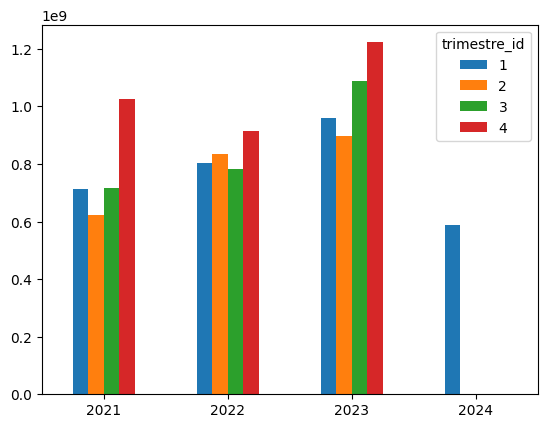

In [321]:
valor_trimestre = df[["ano","trimestre_id","valor"]]
valor_trimestre = pd.pivot_table(valor_trimestre,
                                 values="valor",
                                 columns=["trimestre_id"],
                                 index=["ano"],
                                 aggfunc="sum")
valor_trimestre = pd.DataFrame(valor_trimestre, index=valor_trimestre.index.values)
valor_trimestre.plot.bar(rot=0)